# Problem 1

## Preparing DataSet and Visualization

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


Dimensions of the dataset: (150, 5)
Number of samples: 150
Mean of the features:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64
Variance of the features:
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
target               0.671141
dtype: float64
Correlation matrix:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.

/home/amirhosseion/miniconda3/envs/TestPy/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


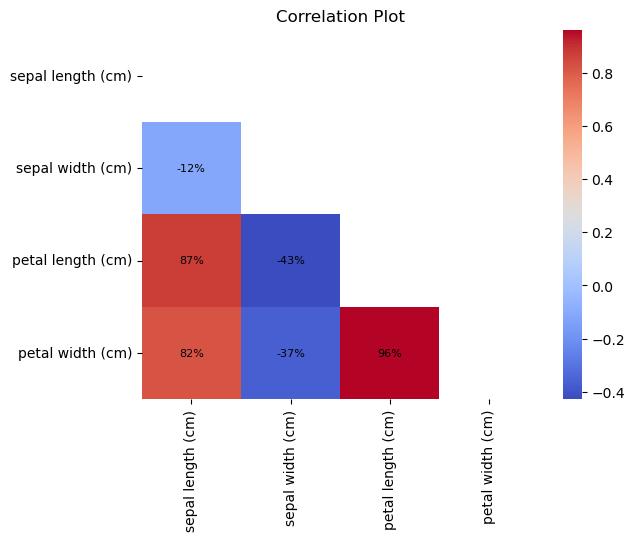

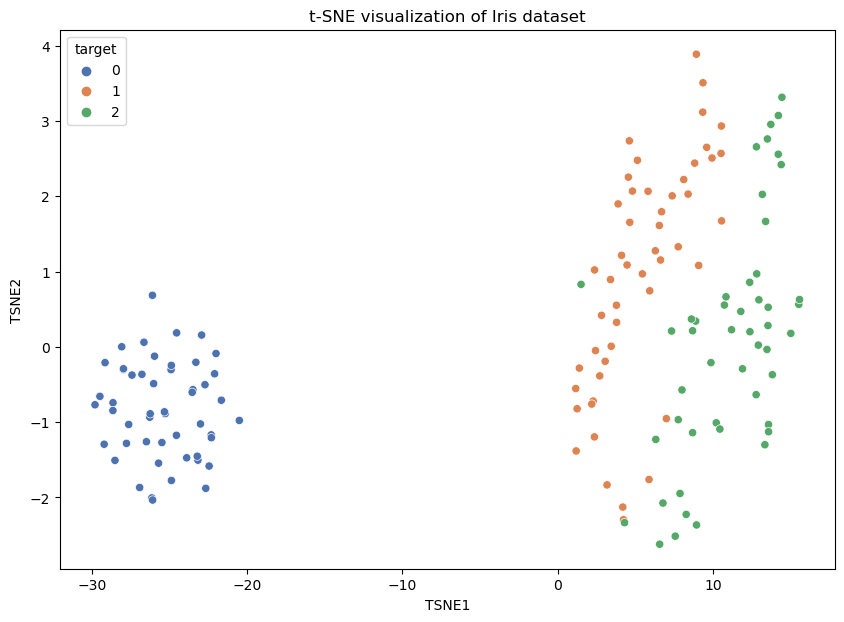

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Obtain information
dimensions = df.shape
number_of_samples = df.shape[0]
mean = df.mean()
variance = df.var()
correlation = df.corr()

# Print the information
print("Dimensions of the dataset:", dimensions)
print("Number of samples:", number_of_samples)
print("Mean of the features:\n", mean)
print("Variance of the features:\n", variance)
print("Correlation matrix:\n", correlation)

# Plot the correlation matrix
# Calculate correlation matrix
numerical = df.select_dtypes(include=['float64']).columns
corr_matrix = df[numerical].corr()
# Calculate percentage of correlation
percent_corr = corr_matrix * 100
# Extract upper triangular part of the correlation matrix
upper_triangular = np.triu(corr_matrix)

# Plot the correlation matrix using seaborn
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=upper_triangular)
# Add percentage values inside each square
for i in range(1,len(upper_triangular)):
    for j in range(0,i):
        plt.text(j + 0.5, i + 0.5, '{:.0f}%'.format(percent_corr.iloc[i, j]),
                 ha='center', va='center', color='black', fontsize=8)

# Customizing plot
plt.title('Correlation Plot')

# Show plot
plt.show()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=94)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame for t-SNE results
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['target'] = y

# Plot the t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='target', palette='deep')
plt.title('t-SNE visualization of Iris dataset')
plt.show()



### Reduce dimention of data with LDA and PCA

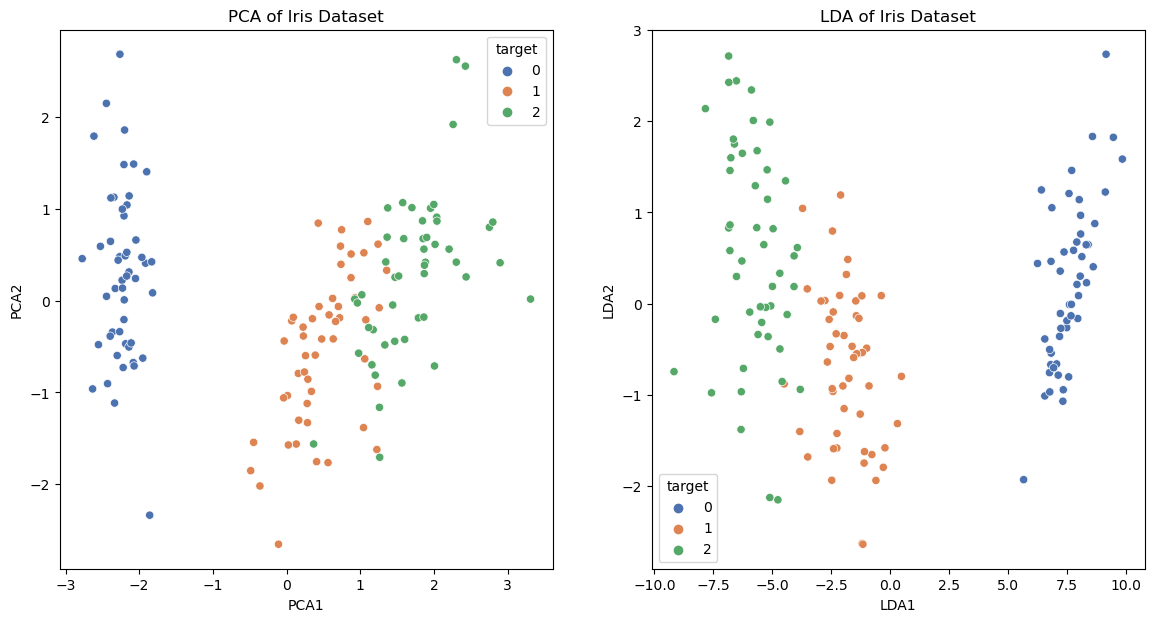

In [3]:
# Import  libraries
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['target'] = y

# Apply LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y) 
df_lda = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
df_lda['target'] = y

# Plot PCA results
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='target', palette='deep')
plt.title('PCA of Iris Dataset')

# Plot LDA results
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_lda, x='LDA1', y='LDA2', hue='target', palette='deep')
plt.title('LDA of Iris Dataset')

plt.show()


## Apply SVM algorithm with linear kernel by LDA method

Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


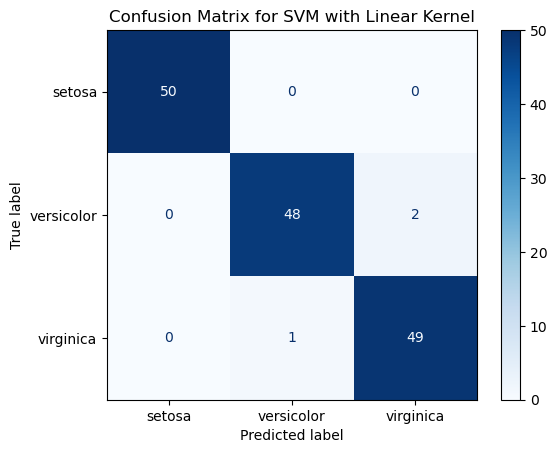

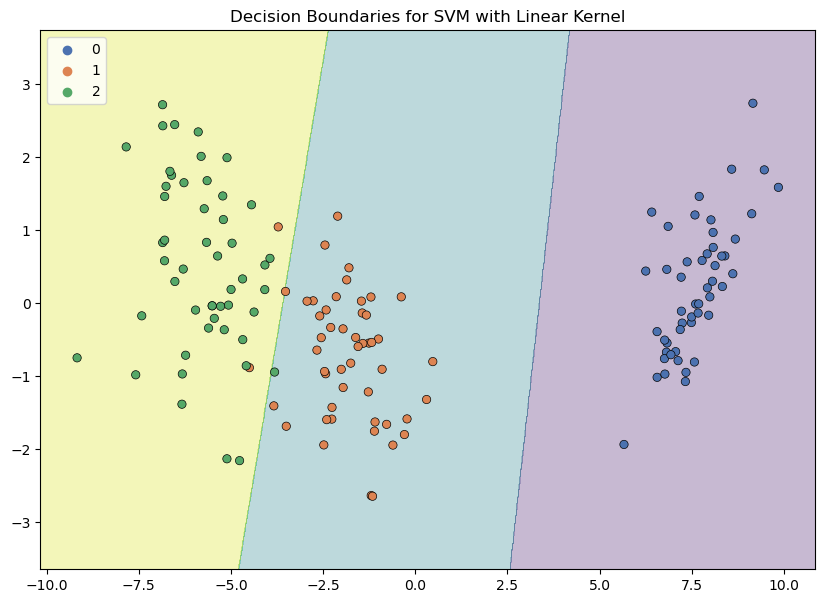

In [4]:
# Import libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Apply LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)  

# Train SVM with linear kernel
svm = SVC(kernel='linear')
svm.fit(X_lda, y)

# Predict the classes
y_pred = svm.predict(X_lda)

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for SVM with Linear Kernel')
plt.show()

# Plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    # Plot the decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)

    # Plot the original data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='deep', ax=ax, edgecolor='k')
    ax.set_title('Decision Boundaries for SVM with Linear Kernel')

# Create a plot for decision boundaries
fig, ax = plt.subplots(figsize=(10, 7))
plot_decision_boundaries(X_lda, y, svm, ax)
plt.show()


## Apply SVM algorithm with linear kernel by PCA and t-SNE method

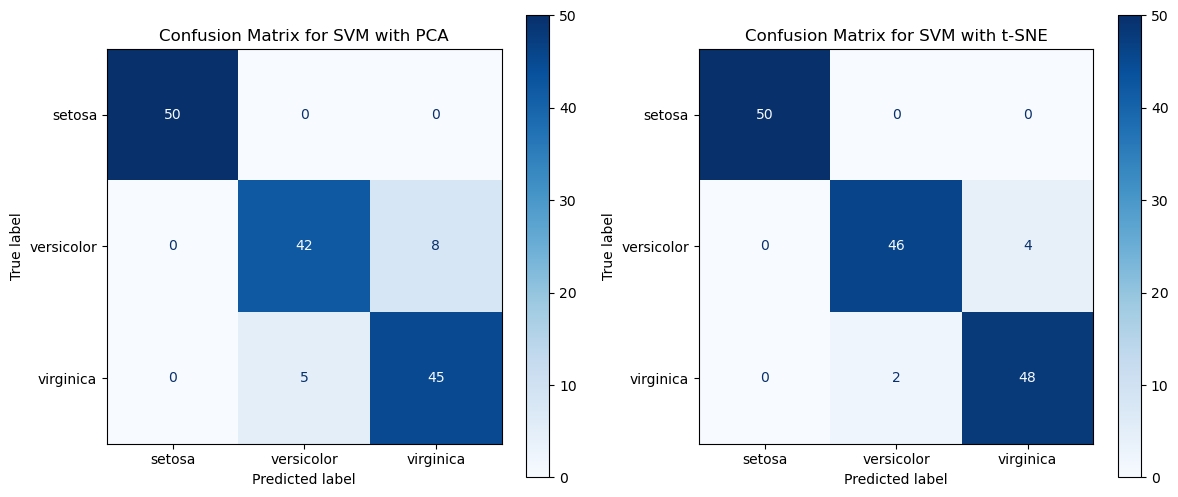

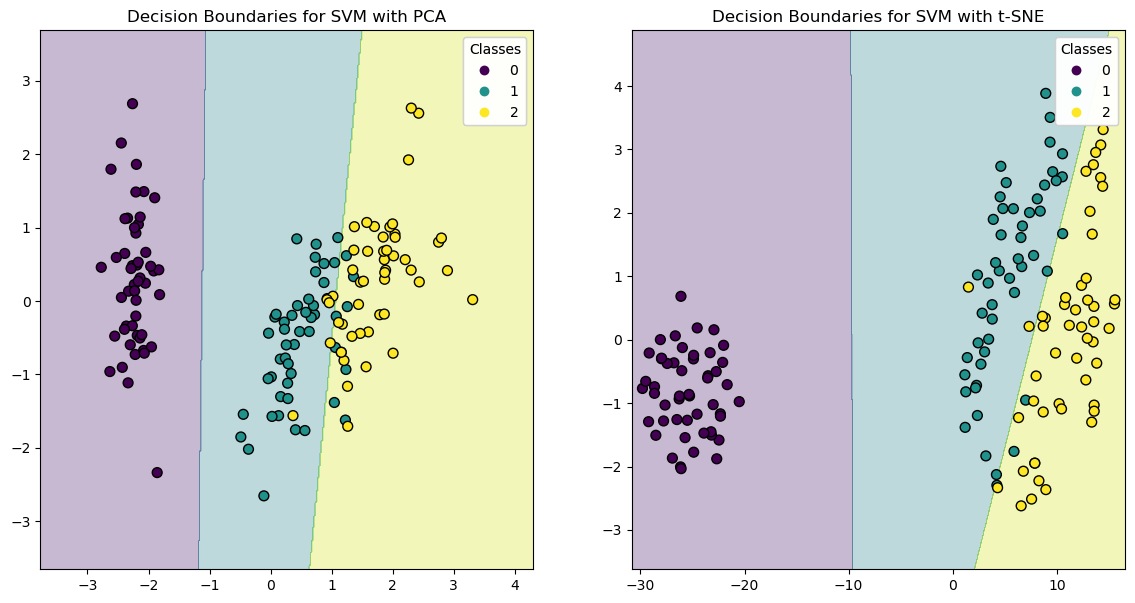

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=94)
X_tsne = tsne.fit_transform(X_scaled)

# Train SVM with linear kernel on PCA-reduced data
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_pca, y)
y_pred_pca = svm_pca.predict(X_pca)
cm_pca = confusion_matrix(y, y_pred_pca)

# Train SVM with linear kernel on t-SNE-reduced data
svm_tsne = SVC(kernel='linear')
svm_tsne.fit(X_tsne, y)
y_pred_tsne = svm_tsne.predict(X_tsne)
cm_tsne = confusion_matrix(y, y_pred_tsne)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=iris.target_names)
disp_pca.plot(cmap='Blues', ax=axes[0], values_format='d')
axes[0].set_title('Confusion Matrix for SVM with PCA')

disp_tsne = ConfusionMatrixDisplay(confusion_matrix=cm_tsne, display_labels=iris.target_names)
disp_tsne.plot(cmap='Blues', ax=axes[1], values_format='d')
axes[1].set_title('Confusion Matrix for SVM with t-SNE')

plt.show()

# Plot decision boundaries
def plot_decision_boundaries(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)

    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
plot_decision_boundaries(X_pca, y, svm_pca, axes[0], 'Decision Boundaries for SVM with PCA')
plot_decision_boundaries(X_tsne, y, svm_tsne, axes[1], 'Decision Boundaries for SVM with t-SNE')
plt.show()


## Apply SVM with diffrent degree

Degree 1: Accuracy = 0.99
Degree 2: Accuracy = 0.89
Degree 3: Accuracy = 0.97
Degree 4: Accuracy = 0.88
Degree 5: Accuracy = 0.96
Degree 6: Accuracy = 0.87
Degree 7: Accuracy = 0.94
Degree 8: Accuracy = 0.85
Degree 9: Accuracy = 0.93
Degree 10: Accuracy = 0.83


/tmp/ipykernel_378/722822064.py:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


GIF saved at: svm_poly_images/svm_poly_decision_boundaries.gif


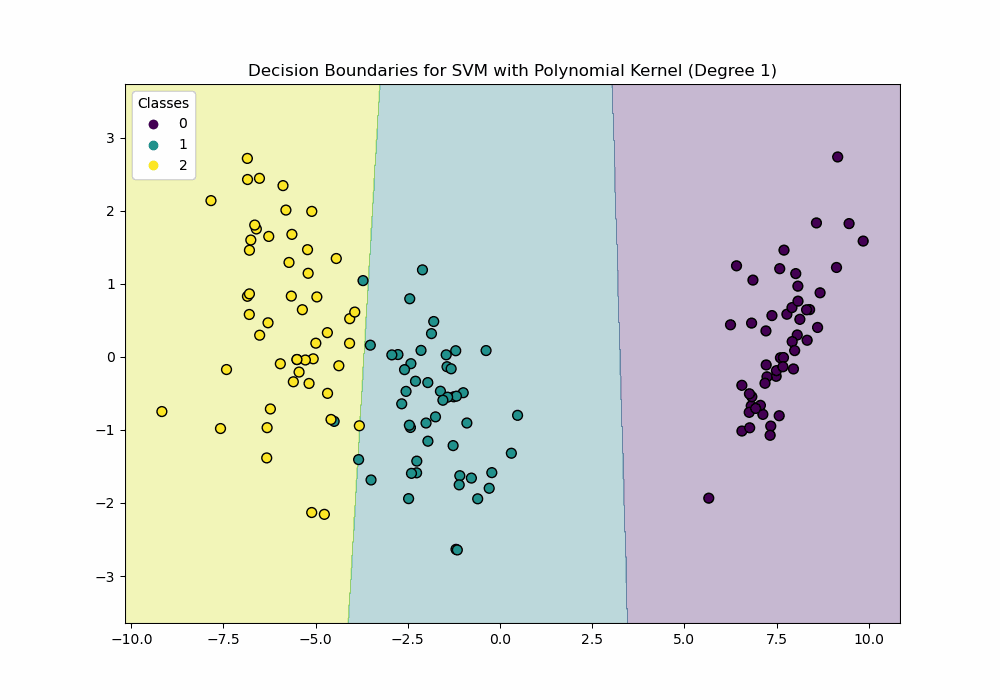

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import imageio
import os
# Apply LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# Function to plot decision boundaries and save as image
def plot_decision_boundaries_and_save(X, y, model, degree, directory):
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 7))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_title(f'Decision Boundaries for SVM with Polynomial Kernel (Degree {degree})')
    
    # Save plot
    filepath = os.path.join(directory, f'degree_{degree}.png')
    plt.savefig(filepath)
    plt.close(fig)
    return filepath

# Directory to save images
image_directory = "svm_poly_images"
os.makedirs(image_directory, exist_ok=True)

# List to hold accuracy for each degree
accuracies = []

# List to hold image paths for GIF creation
image_paths = []

# Train SVM with polynomial kernels of degree 1 to 10 and plot results
for degree in range(1, 11):
    svm_poly = SVC(kernel='poly', degree=degree)
    svm_poly.fit(X_lda, y)
    y_pred = svm_poly.predict(X_lda)
    acc = accuracy_score(y, y_pred)
    accuracies.append((degree, acc))
    
    # Plot decision boundaries and save image
    image_path = plot_decision_boundaries_and_save(X_lda, y, svm_poly, degree, image_directory)
    image_paths.append(image_path)

# Compare accuracies
for degree, acc in accuracies:
    print(f'Degree {degree}: Accuracy = {acc:.2f}')

# Create GIF
images = []
for filename in image_paths:
    images.append(imageio.imread(filename))
gif_path = os.path.join(image_directory, 'svm_poly_decision_boundaries.gif')
imageio.mimsave(gif_path, images, duration=1)

print(f'GIF saved at: {gif_path}')

# Display the GIF in the notebook
from IPython.display import Image
Image(gif_path)

## From Scratch SVM

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

class SVM:
    def __init__(self, in_features, degree=1, n_iter=1000, eta=0.01, c=1.0, random_state=94):
        np.random.seed(random_state)
        self.w = np.random.randn(in_features, 1)
        self.b = np.random.randn()
        self.degree = degree
        self.n_iter = n_iter
        self.eta = eta
        self.c = c
        self.loss_hist = []

    def polynomial_kernel(self, X1, X2, degree):
        return (1 + np.dot(X1, X2.T)) ** degree

    def fit(self, X, y):
        y = y.reshape(-1, 1)
        for i in range(self.n_iter):
            y_hat = self.predict(X)
            mask = np.squeeze((1 - y * y_hat) > 0)
            if mask.sum() == 0:
                break
            loss = self._loss(y, y_hat, mask)
            grad_w, grad_b = self._grad(X, y, y_hat, mask)
            self.w -= self.eta * grad_w
            self.b -= self.eta * grad_b
            self.loss_hist.append(loss)

    def predict(self, X):
        return self.polynomial_kernel(X, self.w.T, self.degree) + self.b

    def score(self, X, y):
        y_hat = self.predict(X)
        return self._accuracy(y, y_hat, t=0)

    def _accuracy(self, y, y_hat, t=0):
        y_hat = np.where(y_hat < t, -1, 1)
        acc = np.sum(y == y_hat) / len(y)
        return acc

    def _loss(self, y, y_hat, mask):
        y_mask = y[mask]
        y_hat_mask = y_hat[mask]
        return np.maximum(0, 1 - y_mask * y_hat_mask).mean()

    def _grad(self, X, y, y_hat, mask):
        X_mask = X[mask]
        y_mask = y[mask]
        grad_w = (-y_mask * X_mask).mean(axis=0).reshape(self.w.shape) + self.c * self.w
        grad_b = (-y_mask).mean(axis=0)
        return grad_w, grad_b

class MulticlassSVM:
    def __init__(self, in_features, degree=1, n_iter=1000, eta=0.01, c=1.0, random_state=94):
        self.models = []
        self.degree = degree
        self.in_features = in_features
        self.n_iter = n_iter
        self.eta = eta
        self.c = c
        self.random_state = random_state

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            y_binary = np.where(y == cls, 1, -1)
            svm = SVM(in_features=self.in_features, degree=self.degree, n_iter=self.n_iter, eta=self.eta, c=self.c, random_state=self.random_state)
            svm.fit(X, y_binary)
            self.models.append(svm)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.classes)))
        for idx, svm in enumerate(self.models):
            predictions[:, idx] = svm.predict(X).ravel()
        return self.classes[np.argmax(predictions, axis=1)]

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Function to plot decision boundaries and save as image
def plot_decision_boundaries_and_save(X, y, model, degree, directory):
    fig, ax = plt.subplots(figsize=(10, 7))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_title(f'Decision Boundaries for SVM with Polynomial Kernel (Degree {degree})')
    filepath = os.path.join(directory, f'degree_{degree}.png')
    plt.savefig(filepath)
    plt.close(fig)
    return filepath




Degree 1: Accuracy = 0.72
Degree 2: Accuracy = 0.71
Degree 3: Accuracy = 0.84
Degree 4: Accuracy = 0.87
Degree 5: Accuracy = 0.86
Degree 6: Accuracy = 0.88
Degree 7: Accuracy = 0.89
Degree 8: Accuracy = 0.89
Degree 9: Accuracy = 0.89
Degree 10: Accuracy = 0.89


/tmp/ipykernel_378/1041844997.py:45: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


GIF saved at: svm_poly_images/svm_scratch_poly_decision_boundaries.gif


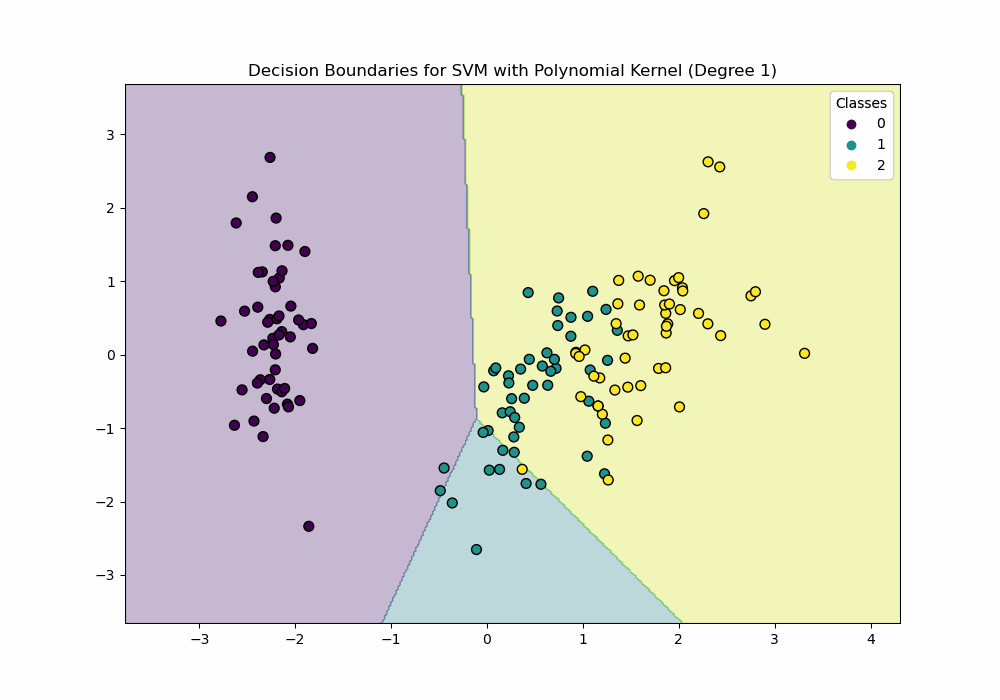

In [24]:
# Load the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Directory to save images
image_directory = "svm_poly_images"
os.makedirs(image_directory, exist_ok=True)

# List to hold accuracy for each degree
accuracies = []

# List to hold image paths for GIF creation
image_paths = []

# Train SVM with polynomial kernels of degree 1 to 10 and plot results
for degree in range(1, 11):
    svm = MulticlassSVM(in_features=2, degree=degree)
    svm.fit(X_pca, y)
    acc = svm.score(X_pca, y)
    accuracies.append((degree, acc))
    
    # Plot decision boundaries and save image
    image_path = plot_decision_boundaries_and_save(X_pca, y, svm, degree, image_directory)
    image_paths.append(image_path)

# Compare accuracies
for degree, acc in accuracies:
    print(f'Degree {degree}: Accuracy = {acc:.2f}')

# Create GIF
images = []
for filename in image_paths:
    images.append(imageio.imread(filename))
gif_path = os.path.join(image_directory, 'svm_scratch_poly_decision_boundaries.gif')
imageio.mimsave(gif_path, images, duration=1)

print(f'GIF saved at: {gif_path}')

# Display the GIF in the notebook
from IPython.display import Image
Image(gif_path)